In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## read and describe the metadata

In [2]:
fpn_csv = 'cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [3]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [4]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,3,"painting, oil on canvas",9964.0,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,6,"sculpture, fabric, glass & metal",3376800.0,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,3,"painting, oil on canvas",28704.0,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,3,"painting, oil, household paint on hardboard",32376.0,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,3,"painting, mixed media on canvas",4380.0,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](https://infovis-wiki.net/wiki/Visual_Variables). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/option_2/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [5]:
X = data[['si', 'kinetic','spatial_dimension2','co','primary_medium','po','sh','li']]

In [6]:
# primary medium data was transformed in to numbers by assigning different numbers for each medium.

In [7]:
# If datae and medium come into play, the categorization becomes to literal. So I decided not to use 'date' eventually.

In [8]:
#work size generates huge variations so not goot either. (I transformed the all the data to numbers by eliminating strings taking average values etc)

In [9]:
X.head()

,si,kinetic,spatial_dimension2,co,primary_medium,po,sh,li
0,2,False,False,0,3,0,3,0
1,3,False,False,0,6,0,2,0
2,0,False,False,4,3,0,4,0
3,3,False,True,0,3,0,4,0
4,0,False,False,1,3,0,4,0


# KMeans

In [10]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

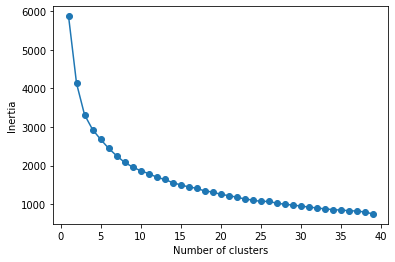

In [11]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 40):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 40), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [12]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [8,10,12,15]

For n_clusters = 8 The average silhouette_score is : 0.24664033796642226


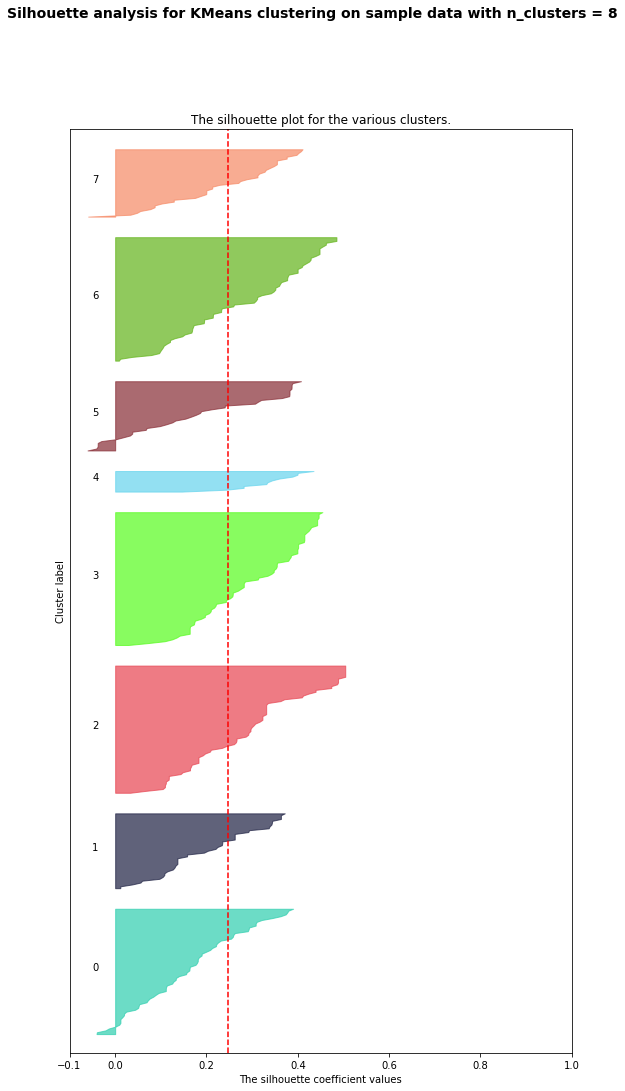

For n_clusters = 10 The average silhouette_score is : 0.24497721790455726


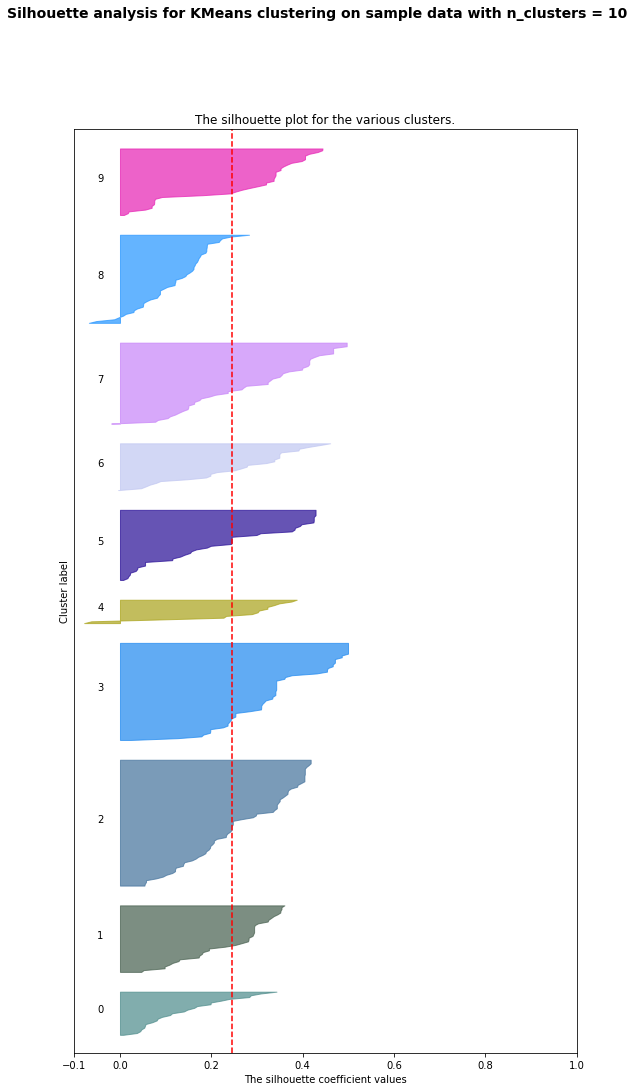

For n_clusters = 12 The average silhouette_score is : 0.23243278190788808


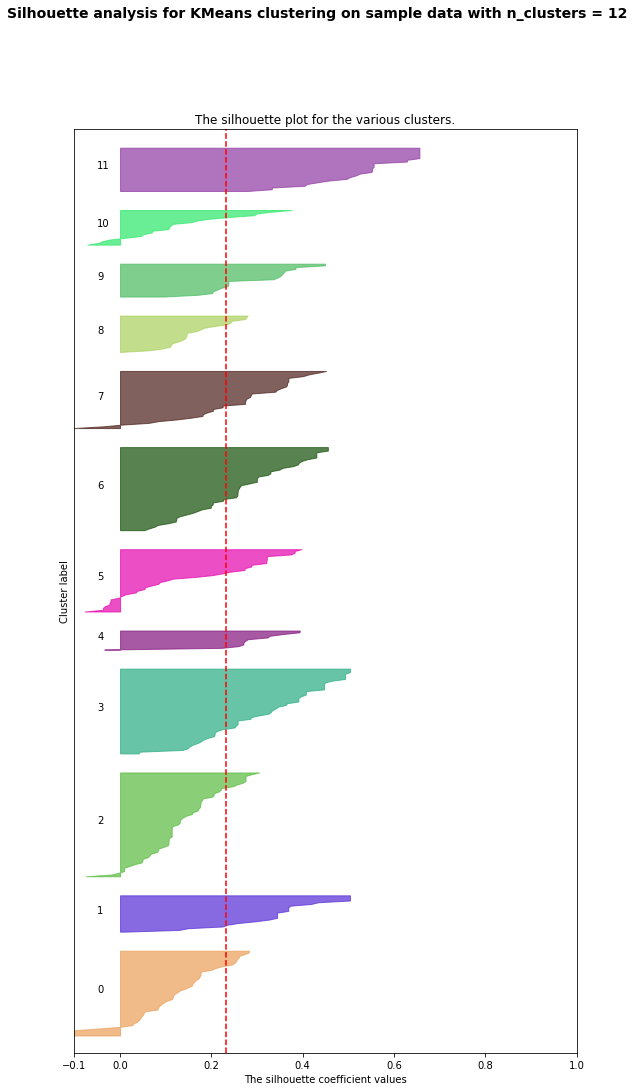

For n_clusters = 15 The average silhouette_score is : 0.24704529096914896


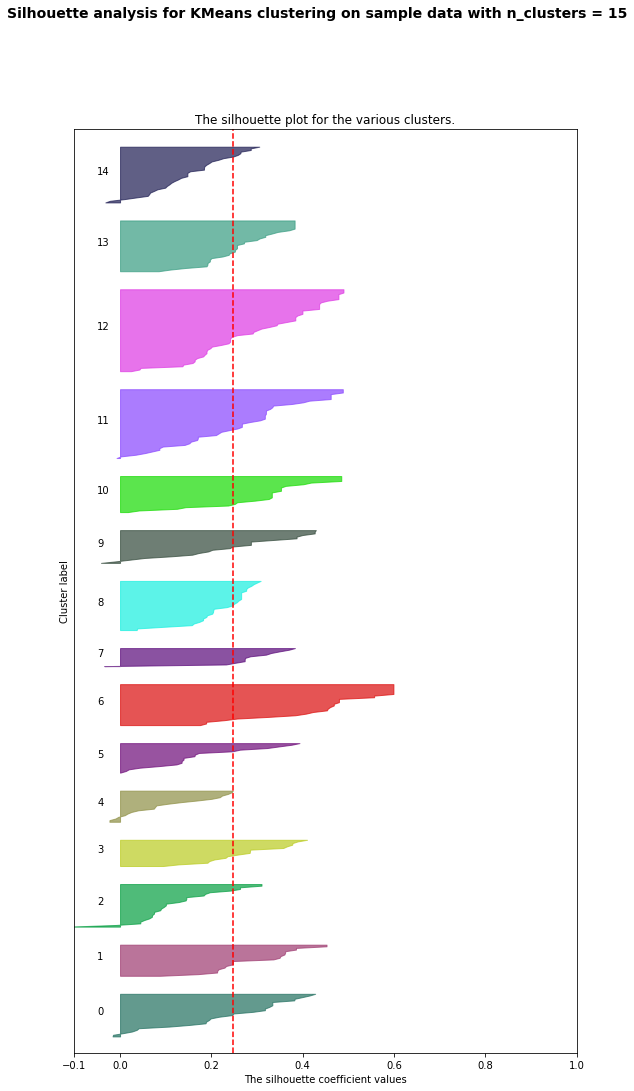

In [13]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=20)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. I have **arbitrarily** chosen 5. 

In [14]:
# set the number of clusters in the final model
# 15 has comparably even distribution as well as acceptable(?) negative over shoots.
my_n_clusters = 15

In [15]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [16]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
169_small.jpg
240_small.jpg
284_small.jpg
303_small.jpg
352_small.jpg
360_small.jpg
381_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
62_small.jpg
89_small.jpg
129_small.jpg
135_small.jpg
165_small.jpg
189_small.jpg
206_small.jpg
219_small.jpg
227_small.jpg
258_small.jpg
312_small.jpg
314_small.jpg
359_small.jpg
391_small.jpg
404_small.jpg
405_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 2
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
2_small.jpg
4_small.jpg
5_small.jpg
6_small.jpg
12_small.jpg
19_small.jpg
21_small.jpg
23_small.jpg
25_small.jpg
26_small.jpg
30_small.jpg
33_small.jpg
34_small.jpg
38_small.jpg
50_small.jpg
58_small.jpg
70_small.jpg
79_small.jpg
80_small.jpg
84